## Observations and Insights 

In [136]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouse_study_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [137]:
# Checking the number of mice.
mice_unique_df=mouse_study_df.nunique()["Mouse ID"]
mice_unique_df


249

In [138]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse=mouse_study_df.loc[mouse_study_df.duplicated(subset=["Mouse ID","Timepoint"])]

duplicate_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [139]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [140]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse=mouse_study_df.set_index("Mouse ID")
clean_mouse_df=clean_mouse.drop(index = "g989")
cleaner_mouse_df=clean_mouse_df.reset_index()
cleaner_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [141]:
# Checking the number of mice in the clean DataFrame.
cleaner_mouse_unique_df=cleaner_mouse_df.nunique()["Mouse ID"]
cleaner_mouse_unique_df



248

## Summary Statistics

In [142]:
drug_mouse=mouse_study_df["Drug Regimen"].value_counts()
drug_mouse

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [143]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

tumor_mean=mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tumor_median=mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
tumor_var=mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
tumor_sd=mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
tumor_sem=mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_regimen_df=pd.DataFrame({"Mean":tumor_mean, "Median":tumor_median, "Variance":tumor_var,
                                 "Standard Deviation":tumor_sd, "SEM":tumor_sem})
summary_regimen_df



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [144]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_group=mouse_study_df.groupby(["Drug Regimen"])
summary2_regimen=regimen_group.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary2_regimen



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

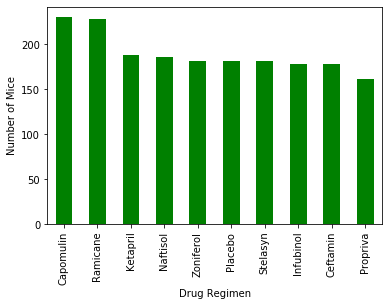

In [145]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 
fig_1=plt.figure()
drug=cleaner_mouse_df["Drug Regimen"]
drug_mouse.plot.bar(drug_mouse, color="green")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()


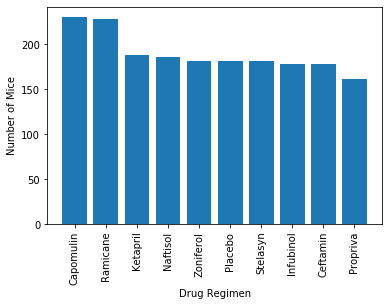

In [146]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.
fig_2=plt.figure()
drug=cleaner_mouse_df["Drug Regimen"]
plt.bar(drug_mouse.index.values,drug_mouse.values)
plt.xticks(rotation=90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.show()




Male      958
Female    935
Name: Sex, dtype: int64

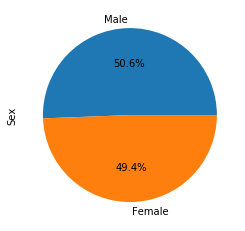

In [147]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_mouse=mouse_study_df["Sex"].value_counts()
sex_mouse
sex_mouse.plot.pie(y="Sex",autopct='%1.1f%%')
sex_mouse

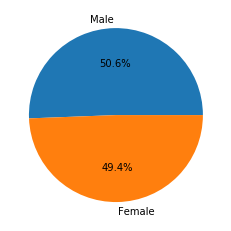

In [148]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse=mouse_study_df["Sex"].value_counts()
sex_mouse
plt.pie(sex_mouse.values,labels=sex_mouse.index.values,autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [149]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse
max_tumor=cleaner_mouse_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor=max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedata=max_tumor.merge(cleaner_mouse_df, on=["Mouse ID", "Timepoint"],how="left")

In [150]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor=mergedata.loc[mergedata["Drug Regimen"]== drug,"Tumor Volume (mm3)"]
    
    # add subset
    tumor_vol_data.append(tumor)

    # Determine outliers using upper and lower bounds    
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
        
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=tumor.loc[(tumor<lower_bound)|(tumor>upper_bound)]
    print(f"{drug}'s Potential outliers: {outliers}")
        

Capomulin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


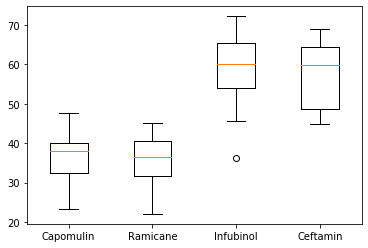

In [151]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1=plt.subplots()
ax1.boxplot(tumor_vol_data,labels=treatment_list)
plt.show()

## Line and Scatter Plots

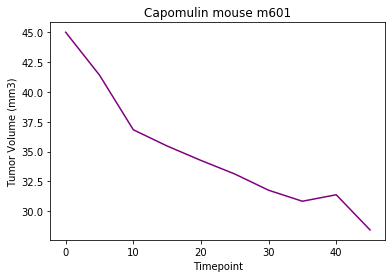

In [129]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin=mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
justa_mouse=capomulin.loc[capomulin["Mouse ID"] == "m601",:]
x_axis= justa_mouse["Timepoint"]
y_axis = justa_mouse["Tumor Volume (mm3)"]

plt.title("Capomulin mouse m601")
plt.plot(x_axis, y_axis, color="purple")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


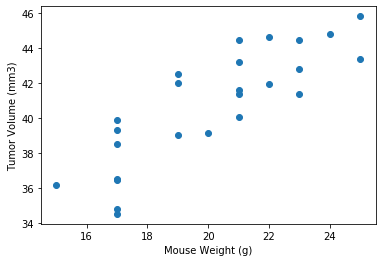

In [131]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin=mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
capomulinavg=capomulin.groupby(["Mouse ID"]).mean()


plt.scatter(capomulinavg["Weight (g)"],capomulinavg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

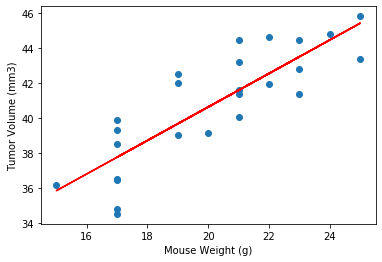

In [135]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin=mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin",:]
capomulinavg=capomulin.groupby(["Mouse ID"]).mean()


plt.scatter(capomulinavg["Weight (g)"],capomulinavg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")


(slope, intercept, rvalue, pvalue, stderr)= stats.linregress(capomulinavg["Weight (g)"],capomulinavg["Tumor Volume (mm3)"])
regress_values= capomulinavg["Weight (g)"] * slope + intercept
line_eq="y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))

plt.plot(capomulinavg["Weight (g)"],regress_values,"r-")





plt.show()


